Liste des générateurs :
- Park & Miller / Standard Minimal
- Mitchell et Moore (fibo)
- bbs (blum blum shub)
- Mersenne Twister (déjà codé lib random python)

#### Import des bibliothèqes :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kurtosis, skew
from math import ceil, gcd
import random
import scipy.stats as stats
import pylab 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot_2samples

#### Fonctions utilitaires :

In [34]:
def get_seed():
    return random.random() * 1_000_000

def LCG(m,a,c, x0, xn):
    res=[x0]
    for i in range(xn):
        x0=(a*x0+c)%m
        res.append(x0)
    return res

# I - Présentation des générateurs

## a - Park & Miller / Standard Minimal

xn+1 = 16807 ∗xn mod (231 −1)

In [3]:
def park_miller_normalized(x0, xn):
    m = pow(2, 31) - 1
    res = LCG(m, 16807, 0, x0, xn)
    return [elem / m for elem in res]

def park_miller(x0, xn):
    m = pow(2, 31) - 1
    return LCG(m, 16807, 0, x0, xn)

## b - Mitchell & Moore

In [4]:
def mitchell_moore(xn, m):
    res = park_miller(get_seed(), 56)
    
    for i in range(57, 57 + xn):
        res.append((res[i-24] + res[i - 55]) % m)
    
    return [e / m for e in res[57:]] # normalisation

## c - Blum Blum Shub

In [5]:
def blum_blum_shub(seed, xn): # intéret --> difficile à hacker
    seed = int(seed)
    m = 56923661
    if (seed == 0 or seed == 1):
        raise ValueError("Seed should not be equal to 0 or 1.")
    if (gcd(m, seed) != 1):
        raise ValueError(f"Seed should be prime with modulo : {m}")
    
    res = [seed]
    for i in range(xn):
        seed = (seed*seed) % m
        res.append(seed)
    return [e / m for e in res]

## d - Mersenne Twister

Ce générteur est intégré à la bibliothèque random en Python.

In [6]:
random.random()

0.6357719480859928

# II - Test des générateurs

## a - Interprétation graphique

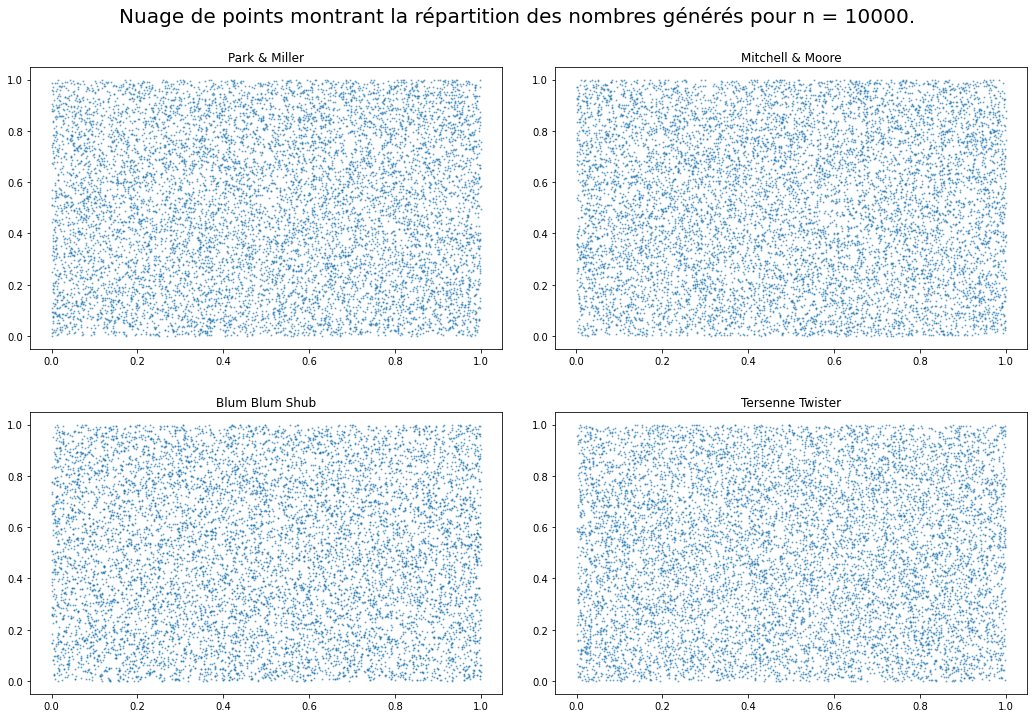

In [7]:
def scatter_plot(l1, l2, title, subtitles):
    fig, ax = plt.subplots(nrows=2, ncols=2)
    fig.suptitle(title, fontsize=20, y=1.02)
    fig.set_size_inches(15, 10)
    i = 0
    for row in ax:
        for col in row:
            col.scatter(l1[i], l2[i], alpha=0.5, s=1)
            col.title.set_text(subtitles[i])
            i += 1
    fig.tight_layout(pad=3.0)
    plt.show()

n = 10_000
title = f'Nuage de points montrant la répartition des nombres générés pour n = {n}.'
subtitles = ['Park & Miller', 'Mitchell & Moore', 'Blum Blum Shub', 'Tersenne Twister']
l1 = [park_miller_normalized(get_seed(), n),
      mitchell_moore(n, 1000),
      blum_blum_shub(get_seed(), n),
      [random.uniform(0, 1) for i in range(n)]]
l2 = [park_miller_normalized(get_seed(), n),
      mitchell_moore(n, 1000),
      blum_blum_shub(get_seed(), n),
      [random.random() for i in range(n)]]

scatter_plot(l1, l2, title, subtitles)

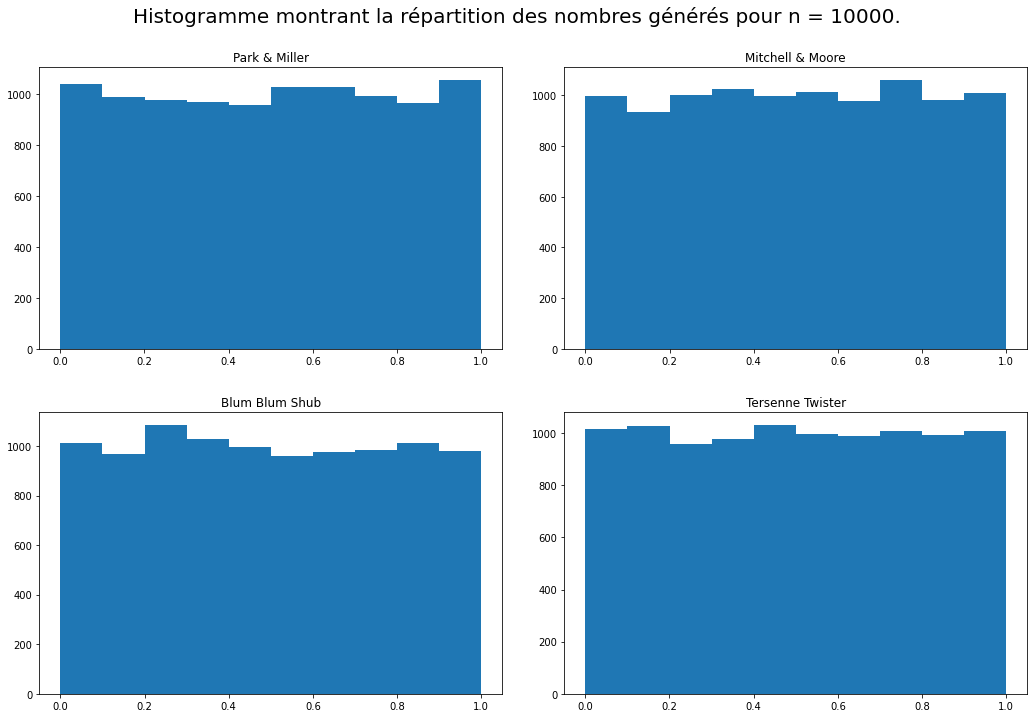

In [15]:
def histo_plot(l, title, subtitles):
    fig, ax = plt.subplots(nrows=2, ncols=2)
    fig.suptitle(title, fontsize=20, y=1.02)
    fig.set_size_inches(15, 10)
    i = 0
    for row in ax:
        for col in row:
            col.hist(l[i])
            col.title.set_text(subtitles[i])
            i += 1
    fig.tight_layout(pad=3.0)
    plt.show()
    
n = 10_000
l = [park_miller_normalized(get_seed(), n),
      mitchell_moore(n, 1000),
      blum_blum_shub(get_seed(), n),
      [random.uniform(0, 1) for i in range(n)]]
title = f'Histogramme montrant la répartition des nombres générés pour n = {n}.'
subtitles = ['Park & Miller', 'Mitchell & Moore', 'Blum Blum Shub', 'Tersenne Twister']

histo_plot(l, title, subtitles)

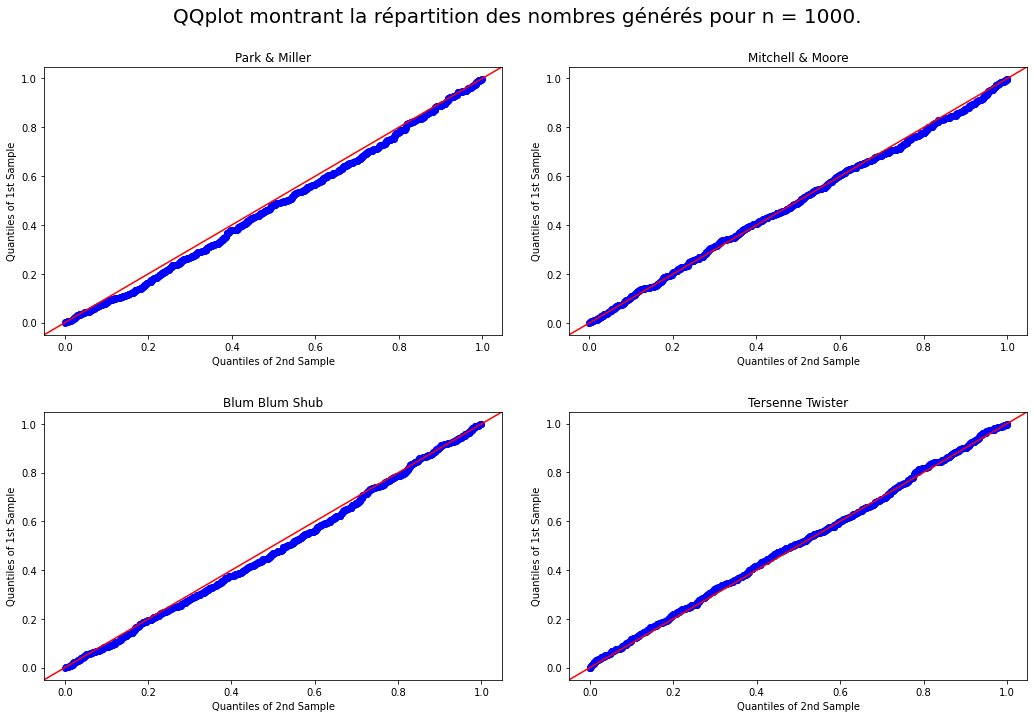

In [21]:
def qq_plot(l1, l2, title, subtitles):
    fig, ax = plt.subplots(nrows=2, ncols=2)
    fig.suptitle(title, fontsize=20, y=1.02)
    fig.set_size_inches(15, 10)
    i = 0
    for row in ax:
        for col in row:
            pp_x = sm.ProbPlot(np.array(l1[i]))
            pp_y = sm.ProbPlot(np.array(l2[i]))
            qqplot_2samples(pp_x, pp_y, line="45", ax=col)
            col.title.set_text(subtitles[i])
            i += 1
    fig.tight_layout(pad=3.0)
    plt.show()
    
n = 1000
title = f'QQplot montrant la répartition des nombres générés pour n = {n}.'
subtitles = ['Park & Miller', 'Mitchell & Moore', 'Blum Blum Shub', 'Tersenne Twister']
l1 = [park_miller_normalized(get_seed(), n),
      mitchell_moore(n, 1000),
      blum_blum_shub(get_seed(), n),
      [random.uniform(0, 1) for i in range(n)]]
l2 = [park_miller_normalized(get_seed(), n),
      mitchell_moore(n, 1000),
      blum_blum_shub(get_seed(), n),
      [random.random() for i in range(n)]]

qq_plot(l1, l2, title, subtitles)

## b - Tests Mathématiques

### Equiprobabilité

In [51]:
def get_percentile(values, percentage: float) -> float:
        sorted_list = sorted(values)
        return sorted_list[ceil(len(values) * (percentage / 100))]

n = 1_000_000
subtitles = ['Park & Miller', 'Mitchell & Moore', 'Blum Blum Shub', 'Tersenne Twister']
l = [park_miller_normalized(get_seed(), n),
      mitchell_moore(n, 1000),
      blum_blum_shub(get_seed(), n),
      [random.uniform(0, 1) for i in range(n)]]

data = {'Quartile 25%': [get_percentile(sublist, 25) for sublist in l],
       'Mean value': [get_percentile(sublist, 50) for sublist in l],
       'Quartile 75%': [get_percentile(sublist, 75) for sublist in l],
       'Variance': [np.var(sublist) for sublist in l],
       'Kurtosis (normalised)': [kurtosis(sublist) for sublist in l],
       'Skewness': [skew(sublist) for sublist in l]}

pd.DataFrame.from_dict(data, orient='index', columns=subtitles)

,Park & Miller,Mitchell & Moore,Blum Blum Shub,Tersenne Twister
Quartile 25%,0.250047,0.250189,0.240473,0.250616
Mean value,0.500288,0.500090,0.489326,0.500995
Quartile 75%,0.749699,0.749566,0.748427,0.750444
Variance,0.083291,0.083271,0.084762,0.083359
Kurtosis (normalised),-1.199108,-1.199189,-1.221248,-1.199559
Skewness,-0.000587,-0.000532,0.023843,-0.001419


### Tests quantitatifs usuels